# Case Study: Cafe Sherlock

A friend of yours just opened a new Sherlock Holmes themed café. Her café is state-of-the-art complete with monitors built into the tables. The business is off to a good start, but she has gotten some feedback that the games could use improvement. She knows that good games keep the customers around a little longer. The games are a way to keep customers entertained while they drink coffee and buy food items. She has some games already, but wants your help to create a few more games to keep customers both informed and entertained.

In [1]:
import os
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Design Thinking

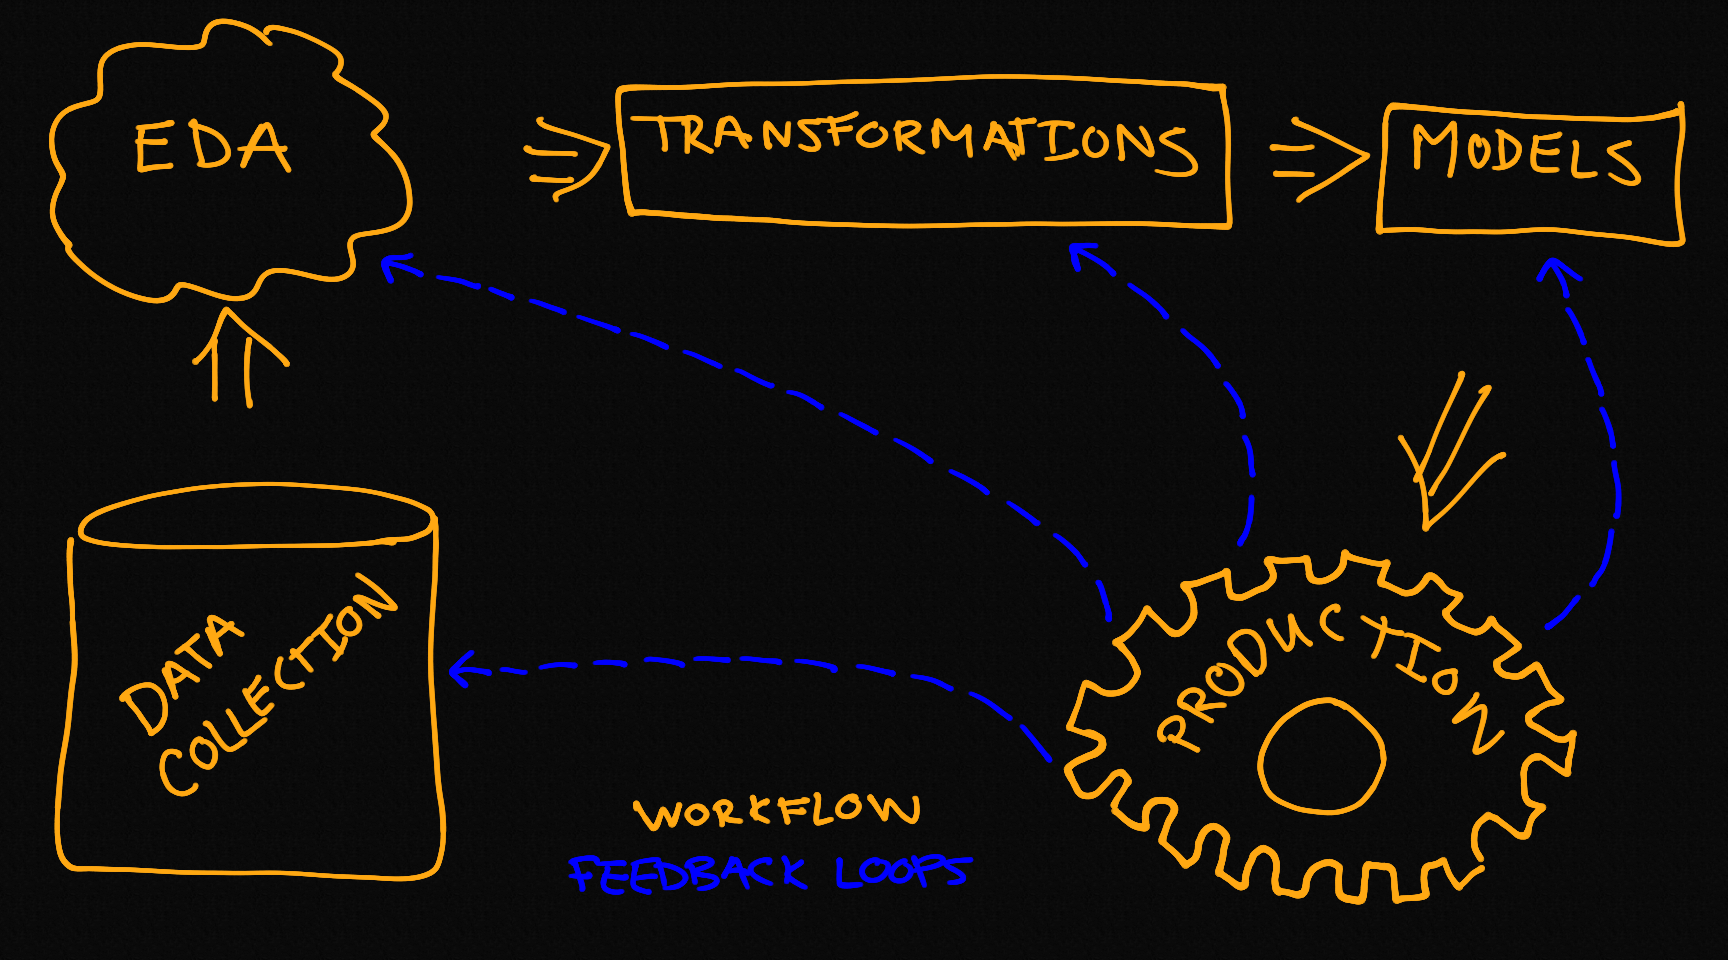

## Empathize


**_In this stage time is dedicated to understanding the business opportunities_**

In this setting the frequency and duration of customer visits are going to be related to overall sales. The initial business opportunity here is How do you ensure new games drive revenue?. There are many other business opportunities, like what is the optimal menu for the customer-base and do seasonal variations of offerings help the business?, but lets focus on the initial one for this example. As part of this stage you would talk with your friend, her employees and some customers to do your best to fully understand the experience of the customer. The important thing here is to spend time on-site simulating the experience of a customer to obtain as genuine an understanding of the problem as possible. You may realize that most customers are there to work or most of them are just passing through. This domain knowledge is useful when making decisions like which new types of new games to create. After you have gathered your information and studied it you will generally articulate the business scenario using a scientific thought process—this means a statement that can be tested. The business opportunity should be stated in a way that minimizes the presence of confounding factors.

There are logical follow-up questions to ask to fully understand the problem, but the next two stages are the more appropriate places to get into these details. Now that you understand the problem it is time to gather the data.

**_HINT_**: This is the stage where we gather all of the data and we make note of what would be ideal data.

The data here are mostly sales and customer profiles. There are two important aspects of the data that would be ideal:

1. The data are at a transaction level (each purchase and its associated data are recorded)
2. We can associate game usage with transactions.

Fortunately for us this is a modern cafe so customers order and play games through the same interface. Additionally, they are incentivized to login to the system and generate a customer profile. In this stage we go through the process of gathering the raw data. This may involve querying a database, gathering files, web-scraping and other mechanisms. It is important to gather all of the relevant data in this stage, because access and quality of the data may force you to modify the business question. It is very difficult to assess the quality of data when it is not in hand. If possible effort should be made to collect even marginally related data.

Let's assume that our initial investigation led us to understand that games that used quotations from books in an interactive way were the most effective. So we have come up with the idea to develop a game that is built on a chatbot that has been trained to talk like Sherlock. This would involve **Natural Language Processing (NLP)** and we would need a corpus. As a start we download _The Adventures of Sherlock Holmes, by Arthur Conan Doyle_.

In [2]:
import requests
text = requests.get('https://www.gutenberg.org/files/1661/1661-0.txt').text

with open("sherlock-holmes.txt", "w") as text_file:
    text_file.write(text)

**ATTENTION**

The data will likely come from multiple sources and if possible this stage should be written in code. Using a mouse and click approach is not scalable. Mouse and click in this case refers to copying, deleting, trimming or otherwise modifying data within a spreadsheet tool or editor. Even better than code is code as an executable script to help facilitate automation.

## Define

**_This is the data wrangling stage_**

Given the data, an understanding of the business scenario and your gathered domain knowledge you will next perform your data cleaning and preliminary exploratory data analysis. To get to the point of preliminary investigation into the findings from the empathize stage it is frequently the case that we need to clean our data.

This could involve parsing JSON, manipulating SQL queries, reading CSV, cleaning a corpus of text, sifting through images, and so much more. One common goal of this part of the process is the creation of one or more Pandas dataframes or NumPy arrays that will be used for initial exploratory data analysis (EDA).

**EDA: Exploratory Data Analysis**

EDA is the process of analyzing data sets to create summaries and visualizations of the data. These summaries and visualizations are then used to guide the use of data for solving business challenges.

In [3]:
text = open("sherlock-holmes.txt", "r").read()

Split the text into sentences and clean it up.

In [4]:
import re
stop_pattern = "\.|\?|\!"
sentences = re.split(stop_pattern, text)
sentences = [re.sub("\r|\n", " ", s.lower()) for s in sentences]
sentences[0]

" project gutenberg's the adventures of sherlock holmes, by arthur conan doyle  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever"

Next we stage the data in an environment that we can begin EDA. To expand the example a little let’s extract a couple of columns indicating if the sentence was about Mr. Holmes or Dr. Watson.

In [5]:
import pandas as pd
has_sherlock = [True if re.search("sherlock|holmes", s) else False for s in sentences]
has_watson = [True if re.search("john|watson", s) else False for s in sentences]

df = pd.DataFrame({"text":sentences, "has_sherlock":has_sherlock, "has_watson":has_watson})
df['num_words'] = df['text'].apply(lambda x: len(x.split(" ")))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7519 entries, 0 to 7518
Data columns (total 4 columns):
text            7519 non-null object
has_sherlock    7519 non-null bool
has_watson      7519 non-null bool
num_words       7519 non-null int64
dtypes: bool(2), int64(1), object(1)
memory usage: 132.2+ KB


Note that we only account for has_watson and has_sherlock, but they may not be mutually exclusive. Ideally we would explicitly account these types of scenarios early on in the workflow to head off problems that may result downstream.

It is a good habit to always visually inspect the data as you gather and transform it.

In [6]:
df.head()

,text,has_sherlock,has_watson,num_words
0,project gutenberg's the adventures of sherloc...,True,False,31
1,"you may copy it, give it away or re-use it u...",False,False,28
2,gutenberg,False,False,1
3,net title: the adventures of sherlock holmes...,True,False,91
4,a scandal in bohemia ii,False,False,13


It can be a valuable exercise to write down the ideal rows and columns before you begin the cleaning process. This way the managers, decision makers and other stakeholders have insight into how they might improve the data collection process.

Sometimes we need to perform a little EDA in order to determine how to best clean the data so these two steps are not necessarily distinct from each other. Visualization, basic hypothesis testing and simple feature engineering are among the most important tasks for EDA at this stage. An minimal example of a EDA plot is one where we look at the average number of words per sentence for the name mentions.

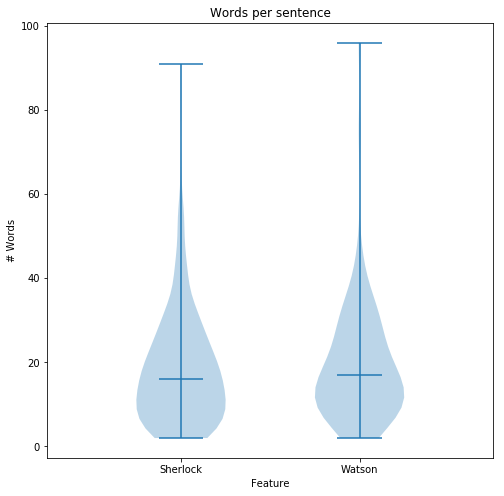

In [7]:
## make eda plot
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

data1 = df[df['has_sherlock']==True]
data2 = df[df['has_watson']==True]

data = [df[df[col]==True]['num_words'].values for col in ['has_sherlock','has_watson']]

pos = [1,2]
ax1.violinplot(data, pos, points=40, widths=0.5,showextrema=True, showmedians=True)

labels = ['Sherlock', 'Watson']
ax1.set_xticks(np.arange(1, len(labels) + 1))
ax1.set_xticklabels(labels)
ax1.set_xlim(0.25, len(labels) + 0.75)
ax1.set_xlabel('Feature')
ax1.set_ylabel('# Words')
ax1.set_title("Words per sentence")

plt.show()

## Ideate

_**This is the stage where we modify out data and features**_

Now that you have clean data the data processing must continue until you are ready to input your data into a model. This stage contains all of the possible data manipulations you might perform before modeling. Perhaps the data need to be log transformed, standardized, reduced in dimensionality, kernel transformed, engineered to contain more features or transformed in some other way.

For our text data we would likely want to dig into the sentences themselves to make sure they fit the desired use case. If we were building a chatbot to engage with in a very Holmes manner then we would likely want to remove any sentences that were not said by Mr. Holmes, but his name was mentioned. If we were building a predictive model to determine which story a phrase would most likely have been generated, we would need to create a new column in our data frame representing the books themselves.

When working with text data many models that we might consider prefer a numeric representation of the data. This may be _occurrences, frequencies, or another transformation_ of the original data. It is in this stage that these types of transformations are readied or carried out. For example here we import the necessary transformers for usage in the next stage.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

# extract the data to be used in the model from the df
labels = np.zeros(df.shape[0])
labels[(df['has_sherlock'] == True)] = 1
labels[(df['has_watson'] == True)] = 2
df['labels'] = labels
df = df[df['labels']!=0]
X = df['text'].values
y = df['labels'].values

There are a lot of ways to prepare data for different models. In some case you will not know the best transformation or series of transformations until you have run the different models and made a comparison. The concept of pipelines is extremely useful for iterating over different permutations of transformers and models. The following topics will be covered in detail during Module 3.

* Unsupervised learning
* Feature engineering
* Dimension Reduction
* Simulation
* Missing value imputation
* Outlier detection

Once the transformations are carried or staged as part of some pipeline it is a valuable exercise to document what you know about the process so far. The form that this most commonly takes is a table of possible modeling strategies complete with the advantages and disadvantages of each.

## Prototype

_**This is the modeling stage**_

The data have been cleaned, processed and staged (ideally in a pipeline) for modeling. The modeling (classic statistics and machine learning) is the bread and butter of data science. This is the stage where most data scientists want to spend the majority of their time. It is where you will interface with the most intriguing aspects of this discipline.

To illustrate the process to the end shown below is a **Support Vector Machine** with **Stochastic gradient decent** as a model. The process involves the use of a `train-test split` and a `pipeline` because we want you to be exposed from the very beginning of this course with best practices. Given this example we also see that there can be considerable overlap between the **ideate** and **prototype** stages. The overlap exists because transformations of data are generally specific to models–as you will explore which model fits the situation best you will be modifying the transformations of your data.

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# carry out the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                        alpha=1e-3, random_state=42,
                        max_iter=1000, tol=1e-3))
])

text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...om_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False))])

## Testing

_**This is the production, testing and feedback loop stage**_

The model works and there are evaluation metrics to provide insight into how well it works. However, the process does not end here. Perhaps the model runs, but it is not yet in production or maybe you want to try different models and/or transformers. Once in production you might want to run some tests to determine if it will handle load or if it will scale well as the data grows. A working model with an impressive f-score does not mean it will be effective in practice. This stage is dedicated to all of the considerations that come after the initial modeling is carried out.

It is also the stage where you will determine how best to iterate. Design thinking like data science is an iterative process. Our model performed very well (see below), possibly because Dr. Holmes and Dr. Watson are described in very different ways in the stories, but it could be something else.

In [10]:
from sklearn import metrics

## evaluate the model performance
predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted,
      target_names=['sherlock','watson']))

              precision    recall  f1-score   support

    sherlock       0.97      1.00      0.98       150
      watson       1.00      0.86      0.93        36

   micro avg       0.97      0.97      0.97       186
   macro avg       0.98      0.93      0.95       186
weighted avg       0.97      0.97      0.97       186



As a scientist you always want to remain skeptical about your findings until you have multiple ways to corroborate them. You will also want to always be aware of the overall goal of why you are doing the work you are doing. This example is an interesting metaphor for what can happen as a data scientist. It is possible to go down a path that may only marginally be related to the central business question. Developing a game here is not unlike using a new model for deep-learning or incorporating a new technology into your workflow—it may be fun and it may to some degree help the business case, but you need to always ask yourself is this the best way for me or my team to address the business problem? The questions your ask here are going to guide how best to iterate on the entire workflow.